In [19]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt
appended_data = []
for page in range(1,19):
    xml = requests.get("http://api.worldbank.org/v2/indicator?per_page=1000&page={}".format(page)).content
    soup = BeautifulSoup(xml,"xml")
    for node in soup.find_all("wb:indicator"):
        id = node.attrs["id"]
        name = node.find("wb:name").text
        note = node.find("wb:sourceNote").text
        source = node.find("wb:source").text
        sourceID = node.find("wb:source").attrs["id"]
        df=  [sourceID,source,id,name,note]
        appended_data.append(df)
Source_info = pd.DataFrame(appended_data,columns=["SourceId","Source","IndicatorID","Indicator_Name","Note"])
ht = requests.get("https://www.nationsonline.org/oneworld/country_code_list.htm").content
soup1 = BeautifulSoup(ht)
table_html = soup1.find("table",{"id":"CountryCode"})
table = pd.read_html(str(table_html),header = 0, index_col = "A")
cc = pd.DataFrame(table[0])
cc =cc.drop(columns = 'Unnamed: 0')


In [81]:
def Search_Indicator(searchword):
    x= (Source_info[Source_info['Indicator_Name'].str.contains('{}'.format(searchword),case = False)])
    pd.set_option
    return x

def req_data(Indicator, Country_names = 'all' , start = 'all', end = 'all'):
    base_link = "http://api.worldbank.org/v2/"
    if Country_names == 'all':
        req_link = base_link + "country/all/"
    else:
        c=""
        for count in Country_names:
            Country = cc.loc[l,"A.2"]
            c = c + Country + ";"
        c = c[:-1]
        req_link = base_link + "country/{}/".format(c)
        
    if len(Indicator)>1:
        req_append = []
        Indi = ""
        for i in Indicator:
            source = (Source_info[Source_info['IndicatorID'].str.contains('{}'.format(searchword),case = False)])
            sid = str(int(source["SourceId"]))
            Indi = Indi + i + ";"
        Indi = Indi[:-1]
        req_link = req_link+ "indicator/{}".format(Indi) + "?source={}".format(sid)
        xml2 = requests.get(req_link).content
        soup2 = BeautifulSoup(xml2, "xml")
        for page in range(1,1+int(soup2.find("wb:data").attrs["pages"])):
            xml2 = requests.get( req_link+"&page={}".format(page)).content
            soup2 = BeautifulSoup(xml2, "xml")
            for node in soup2.find_all("wb:data")[1:]:
                country = node.find("wb:country").text
                ISO3 = node.find("wb:countryiso3code").text
                value = node.find("wb:value").text
                year = node.find("wb:date").text
                indicator = node.find("wb:indicator").attrs["id"]
                lst = [indicator,country,ISO3,year,value]
                req_append.append(lst)
    else:
        req_link = req_link + "indicator/" + str(Indicator)
        req_append = []
        xml2 = requests.get(req_link).content
        soup2 = BeautifulSoup(xml2, "xml")
        for page in range(1,int(soup2.find("wb:data").attrs["pages"])):
            req_link = req_link+"?page={}".format(page)
            xml2 = requests.get(req_link = req_link+"?page={}".format(page)).content
            soup2 = BeautifulSoup(xml2, "xml")
            for node in soup2.find_all("wb:data")[1:]:
                country = node.find("wb:country").text
                ISO3 = node.find("wb:countryiso3code").text
                value = node.find("wb:value").text
                year = node.find("wb:date").text
                indicator = node.find("wb:indicator").attrs["id"]
                lst = [indicator,country,ISO3,year,value]
                req_append.append(lst)
                
    req_dt = pd.DataFrame(req_append,columns=["Indicator","Country","ISO3","Year","Value"])
    req_dt["Value"]= pd.to_numeric(req_dt["Value"])
    req_dt["Year"]= pd.to_datetime(req_dt["Year"],format = '%Y').dt.year
    return req_dt

In [87]:
req_dt = req_data(["GE.EST","PV.EST","VA.EST","RQ.EST","RL.EST","CC.EST"])

,Indicator,Country,ISO3,Year,Value
0,GE.EST,Afghanistan,AFG,2019,-1.463875
1,GE.EST,Afghanistan,AFG,2018,-1.457285
2,GE.EST,Afghanistan,AFG,2017,-1.33461
3,GE.EST,Afghanistan,AFG,2016,-1.226363
4,GE.EST,Afghanistan,AFG,2015,-1.322968
...,...,...,...,...,...
26959,CC.EST,Zimbabwe,ZWE,2003,-1.245055
26960,CC.EST,Zimbabwe,ZWE,2002,-1.22844
26961,CC.EST,Zimbabwe,ZWE,2000,-0.9821414
26962,CC.EST,Zimbabwe,ZWE,1998,-0.480248


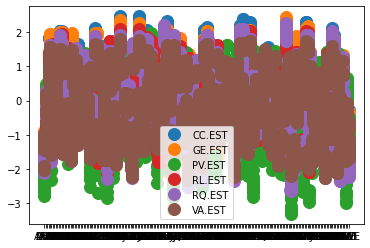

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.ISO3, group.Value, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [ ]:
#01 is april, 02- October
#available from 2007 october
##### IMF emerging markets 

for year in range(2008,2021):
        for period in ["01","02"]:    
        link = "https://www.imf.org/external/pubs/ft/weo/{}/{}/weodata/groups.htm#ae".format(year,period)
        html = requests.get(link).content
        soup = BeautifulSoup(html)
        


In [1]:
import requests
from bs4 import BeautifulSoup
year = 2007
period = "02"
link = "https://www.imf.org/external/pubs/ft/weo/{}/{}/weodata/groups.htm#ae".format(year,period)
html = requests.get(link).content
soup = BeautifulSoup(html)
ae = (soup.find("div",{"class":"fancy"})).find_all("table")

In [46]:
ae[0].text.replace('\n',"").replace('\r',",")

'Advanced EconomiesAustralia,Austria,Belgium,Canada,Cyprus,Denmark,Finland,France,Germany,Greece,Hong Kong SARIceland,Ireland,Israel,Italy,Japan,Korea,Luxembourg,Netherlands,New Zealand,Norway,PortugalSingapore,Slovenia,Spain,Sweden,Switzerland,Taiwan Province of China,United Kingdom,United States'

In [3]:
import pandas as pd
pd.read_html(ae[0])

TypeError: 'NoneType' object is not callable

In [31]:
table = pd.read_html(str(ae[0]))


list

In [36]:
x = pd.DataFrame(table[0])

In [41]:
x.stack()[2]

0    Australia Austria Belgium Canada Cyprus Denmar...
1    Iceland Ireland Israel Italy Japan Korea Luxem...
2    Singapore Slovenia Spain Sweden Switzerland Ta...
dtype: object

In [34]:
x

,0,1,2
0,NaN,NaN,NaN
1,Advanced Economies,Advanced Economies,Advanced Economies
2,Australia Austria Belgium Canada Cyprus Denmar...,Iceland Ireland Israel Italy Japan Korea Luxem...,Singapore Slovenia Spain Sweden Switzerland Ta...
